# Refinement

The [Parthenon](https://en.wikipedia.org/wiki/Parthenon)'s exact geographical location is:

```
Latitude:  37.9715141 
Longitude: 23.7266498
```

<img src="./map_original.jpg" width="40%" />

Its Latitude's binary representation is:

```
100101.1111100010110101001
```

We tweak its Latitude a little bit and we get the following coordinates:

```
Latitude:  37.9881808  
Longitude: 23.7266498
```

<img src="./map_1.jpg" width="40%" />

It is close to the Parthenon area but a bit north. Its Latitude's binary representation is:

```
100101.1111110011111001011 
```

We tweak again the original Latitude a bit and we get the following coordinates:

```
Latitude:  37.9548475
Longitude: 23.7266498
```

<img src="./map_2.jpg" width="40%" />

It is still close to the Parthenon area but this time a bit south. Its Latitude's binary representation is:

```
100101.1111010001110000111
```

Now let's compare the binary representations of those three locations.

```
Original:    100101.1111100010110101001
Location 1:  100101.1111110011111001011 
Location 2:  100101.1111010001110000111
```

We see that they stay the same up until the 4th or 5th bit of the fraction part. It is not really a surprise, since their decimal representations are also similar up to a point. So if we tweak some bits from there and to the right, then we get a location north or south of the original, but not too far away. 

Someone could use this method to blur their location, up to a degree. That is, they would not want to end up with the location of the Statue of Liberty when their actual location is the Parthenon of Athens. They also would want to do that with both the Latitude and the Longtitude. But for our purposes of this example we will use the Latitude only. And we will only change two bits. Which could correspond to the 5th and the 6th bit of the fration part.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
try:
    from qif import *
except: # install qif if not available (for running in colab, etc)
    import IPython; IPython.get_ipython().run_line_magic('pip', 'install qif')
    from qif import *

In [2]:
def get_pi(p, p_pos, n):
    return np.array([p if i == p_pos else (1-p)/(n-1) for i in range(n)])

def get_C(p, n):
    return np.array([get_pi(p, i, n) for i in range(n)])

In [3]:
n = 4  # = 2^2 = possible combinations of 2 bits

### Producing the actual location with probability $p = 0.7$

Consider the following channel matrix $C_1$. It produces the exact location with probability of $0.7$ and distributes the remaining $0.3$ to the other possible outcomes.

$$
\begin{array}{|c|c|c|c|}
\hline
C_1 & \texttt{00} & \texttt{01} & \texttt{10} & \texttt{11}  \\ \hline
\texttt{00} & \textbf{0.7} & 0.1 & 0.1 & 0.1\\ \hline
\texttt{01} & 0.1 & \textbf{0.7} & 0.1 & 0.1 \\ \hline
\texttt{10} & 0.1 & 0.1 & \textbf{0.7} & 0.1 \\ \hline
\texttt{11} & 0.1 & 0.1 & 0.1 & \textbf{0.7} \\ \hline
\end{array}
$$

In [4]:
C1 = get_C(0.7, n)
print("C1:\n", C1)

C1:
 [[0.7 0.1 0.1 0.1]
 [0.1 0.7 0.1 0.1]
 [0.1 0.1 0.7 0.1]
 [0.1 0.1 0.1 0.7]]


Given a uniform prior, we compute its Posterior Bayes Vulnerability and Multiplicative Bayes Capacity.

In [5]:
pi = probab.uniform(len(C1[0]))

In [6]:
print("Posterior Bayes Vulnerability:", measure.bayes_vuln.posterior(pi, C1))
print("Multiplicative Bayes Capacity:", measure.bayes_vuln.mult_capacity(C1))

Posterior Bayes Vulnerability: 0.7
Multiplicative Bayes Capacity: 2.8


Here the posterior vulnerability corresponds to the probability of guessing the actual location by observing the blurred location that $C_1$ outputs. Notice that the channel's posterior vulnerability is equal $0.7$ which is equal to the $p$ parameter.

### Producing the actual location with probability $p = 0.6$

Someone could be curious to epxeriment with a channel using a smaller $p$ of let's say $0.6$. Channel matrix $C_2$ represents this case.

$$
\begin{array}{|c|c|c|c|}
\hline
C_2 & \texttt{00} & \texttt{01} & \texttt{10} & \texttt{11} \\ \hline
\texttt{00} & \textbf{0.6} & 0.133 & 0.133 & 0.133 \\ \hline
\texttt{01} & 0.133 & \textbf{0.6} & 0.133 & 0.133 \\ \hline
\texttt{10} & 0.133 & 0.133 & \textbf{0.6} & 0.133 \\ \hline
\texttt{11} & 0.133 & 0.133 & 0.133 & \textbf{0.6} \\ \hline
\end{array}
$$

In [7]:
C2 = get_C(0.6, n)
# C2[1] = np.array(get_pi(1, 1, n))
print("C2:\n", C2)

C2:
 [[0.6        0.13333333 0.13333333 0.13333333]
 [0.13333333 0.6        0.13333333 0.13333333]
 [0.13333333 0.13333333 0.6        0.13333333]
 [0.13333333 0.13333333 0.13333333 0.6       ]]


Let's also compute its Posterior Bayes Vulnerability and Multiplicative Bayes Capacity again, under a uniform prior.

In [8]:
print("Posterior Bayes Vulnerability:", measure.bayes_vuln.posterior(pi, C2))
print("Multiplicative Bayes Capacity:", measure.bayes_vuln.mult_capacity(C2))

Posterior Bayes Vulnerability: 0.6
Multiplicative Bayes Capacity: 2.4


Notice that again its posterior vulnerability is equal to the $p$ parammeter which is the probability of the actual location appearing on the output.

### Comparing $C_1$ and $C_2$

The vulnerability of $C_2$ is less than that of $C_1$, so **under that specific prior** we are sure that $C_2$ leaks in general less information about our true location than $C_1$. But what happens under different priors? Maybe a specific adversary has a different knowledge about what our true location might be **before** observing the channel's output. That would correspond to a different prior distribution.

Someone might say that $C_2$ seems like leaking less information in general. $C_2$ also has a smaller multiplicative capacity. But can we be sure?

Let's see what happens under a specific family of prior distritubtions generated by `get_pi(p)`. 

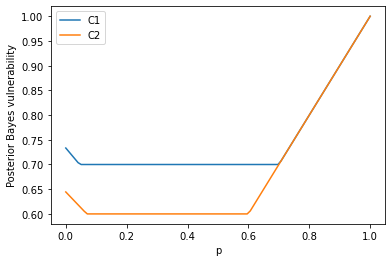

In [9]:
ps = np.linspace(0, 1, 100)
plt.plot(ps, [measure.bayes_vuln.posterior(get_pi(p, 0, n), C1) for p in ps], label="C1")
plt.plot(ps, [measure.bayes_vuln.posterior(get_pi(p, 0, n), C2) for p in ps], label="C2")
plt.xlabel('p')
plt.ylabel('Posterior Bayes vulnerability')
plt.legend()
None

Looks like that the posterior vulnerability of $C_2$ is always smaller than that of $C_1$. But if we want to be sure that this happens for every possible prior distribution (or even for every possible gain function), then we have to check for refinement. 

If $C_1$ is refined by $C_2$, then $C_2$ is always more secure than $C_1$. That is, it always has a smaller vulnerability than $C_1$.

In [10]:
refined = refinement.refined_by(C1, C2)
print("Is C1 refined by C2?", refined)

Is C1 refined by C2? True


Looks like our intuition was right!

Refinement also means that $C_2$ is a post processing of $C_1$. That means that there exists a channel $R$ such that takes every output of $C_1$, processes it furtherly, produces an output and in total, their combined behaviour ($C_1$ and $R$) is exactly like that of $C_2$.

In [11]:
R = channel.factorize(C2, C1)
print("Is C1.R == C2? ", np.allclose(C1.dot(R), C2))
print("\nR:\n", R)
print("\nC1.R:\n", C1.dot(R))
print("\nC2:\n", C2)

Is C1.R == C2?  True

R:
 [[0.83333333 0.05555556 0.05555556 0.05555556]
 [0.05555556 0.83333333 0.05555556 0.05555556]
 [0.05555556 0.05555556 0.83333333 0.05555556]
 [0.05555556 0.05555556 0.05555556 0.83333333]]

C1.R:
 [[0.6        0.13333333 0.13333333 0.13333333]
 [0.13333333 0.6        0.13333333 0.13333333]
 [0.13333333 0.13333333 0.6        0.13333333]
 [0.13333333 0.13333333 0.13333333 0.6       ]]

C2:
 [[0.6        0.13333333 0.13333333 0.13333333]
 [0.13333333 0.6        0.13333333 0.13333333]
 [0.13333333 0.13333333 0.6        0.13333333]
 [0.13333333 0.13333333 0.13333333 0.6       ]]


### Different $p$ for some rows

What if we don't use the same $p$ for all the rows, but for some combinations of bits we choose a different distribution? Maybe there occured a weird bug in the implementation of $C_1$ and when the input is $\texttt{01}$, then the output is always $\texttt{01}$. Channel matrix $C_3$ represents this case.

$$
\begin{array}{|c|c|c|c|}
\hline
C_3 & \texttt{00} & \texttt{01} & \texttt{10} & \texttt{11}  \\ \hline
\texttt{00} & \textbf{0.7} & 0.1 & 0.1 & 0.1\\ \hline
\texttt{01} & 0 & \textbf{1} & 0 & 0 \\ \hline
\texttt{10} & 0.1 & 0.1 & \textbf{0.7} & 0.1 \\ \hline
\texttt{11} & 0.1 & 0.1 & 0.1 & \textbf{0.7} \\ \hline
\end{array}
$$

In [12]:
C3 = get_C(0.6, n)
C3[1] = np.array(get_pi(1, 1, n))
print("C3:\n", C3)

C3:
 [[0.6        0.13333333 0.13333333 0.13333333]
 [0.         1.         0.         0.        ]
 [0.13333333 0.13333333 0.6        0.13333333]
 [0.13333333 0.13333333 0.13333333 0.6       ]]


Now how does $C_3$ compare to $C_1$? For 3 out of 4 inputs, $C_3$ behaves just like $C_1$, but for $\texttt{01}$ $C_3$ always tells the truth. How does that affect the total vulnerability of $C_3$?

In [13]:
print("Posterior Bayes Vulnerability:", measure.bayes_vuln.posterior(pi, C3))
print("Multiplicative Bayes Capacity:", measure.bayes_vuln.mult_capacity(C3))

Posterior Bayes Vulnerability: 0.7
Multiplicative Bayes Capacity: 2.8


Looks like $C_3$ has the same vulnerability **under a uniform prior**. Let's experiment with different priors and observe the vulnerabilities of the two channels.

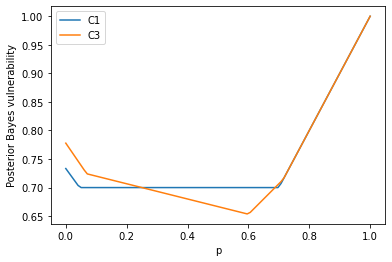

In [14]:
ps = np.linspace(0, 1, 100)
plt.plot(ps, [measure.bayes_vuln.posterior(get_pi(p, 0, n), C1) for p in ps], label="C1")
plt.plot(ps, [measure.bayes_vuln.posterior(get_pi(p, 0, n), C3) for p in ps], label="C3")
plt.xlabel('p')
plt.ylabel('Posterior Bayes vulnerability')
plt.legend()
None

Looks a bit more interesting than the previous plot! Here we see that for some priors, $C_1$ has the lowest vulnerability between the two, but for other priors $C_3$ has the lowest. This means that an adversary with a different knowledge about the prior distribution might prefer one channel over the other.

What we can derive from that is that $C_1$ can't be a refinement of $C_3$ because if it were, then it should always have a lower vulnerability than that of $C_3$.  

For the same reason $C_3$ can't be a refinement of $C_1$.

This can also be verified by checking that there is no matrix $R$ such that $C_3R = C_1$ or $C_1R = C_3$. This is what the `refined_by` function checks for.

In [15]:
refined = refinement.refined_by(C1, C3)
print("Is C1 refined by C3?", refined)

refined = refinement.refined_by(C3, C1)
print("Is C3 refined by C1?", refined)

Is C1 refined by C3? False
Is C3 refined by C1? False


Notice also that $C_1$ and $C_3$ have the same capacity of $2.8$. But that doesn't say much when it comes to comparing two channels. That's because capacity talks about worst case leakage happening on specific priors. But as seen in the plot above, for other priors one channel might be more vulnerable than the other. So if we want comparison under any prior, then we must check for refinement.